In [161]:
import pandas as pd
import time
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

## Mushroom Dataset

Attribute Information: (classes: edible=e, poisonous=p)

cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s

cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s

cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y

bruises: bruises=t,no=f

odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s

gill-attachment: attached=a,descending=d,free=f,notched=n

gill-spacing: close=c,crowded=w,distant=d

gill-size: broad=b,narrow=n

gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y

stalk-shape: enlarging=e,tapering=t

stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?

stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s

stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y

veil-type: partial=p,universal=u

veil-color: brown=n,orange=o,white=w,yellow=y

ring-number: none=n,one=o,two=t

ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z

spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y

population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y

habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

# Load data

In [162]:
DATA_URL = "https://raw.githubusercontent.com/chainer/chainer/master/examples/glance/mushrooms.csv"


In [163]:
df = pd.read_csv(DATA_URL)

# Data exploration

In [164]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [165]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [166]:
df.shape

(8124, 23)

# Data Preprocessing-Label Encoding

In [167]:
l_encoder = LabelEncoder()

In [168]:
df["class"] = l_encoder.fit_transform(df["class"])

In [169]:
x = df.drop("class", axis=1)
y = df["class"]

In [170]:
x.shape

(8124, 22)

In [172]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

In [175]:
categorical_columns

['cap-shape',
 'cap-surface',
 'cap-color',
 'bruises',
 'odor',
 'gill-attachment',
 'gill-spacing',
 'gill-size',
 'gill-color',
 'stalk-shape',
 'stalk-root',
 'stalk-surface-above-ring',
 'stalk-surface-below-ring',
 'stalk-color-above-ring',
 'stalk-color-below-ring',
 'veil-type',
 'veil-color',
 'ring-number',
 'ring-type',
 'spore-print-color',
 'population',
 'habitat']

In [180]:
x_encoded = pd.get_dummies(x, columns=categorical_columns, drop_first=True)

In [181]:
x_encoded.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,False,False,False,False,True,False,True,False,False,False,...,True,False,False,False,True,False,False,False,False,False
2,False,False,False,False,False,False,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,False,False,False,False,True,False,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
4,False,False,False,False,True,False,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [182]:
x = x_encoded

In [190]:
x.shape

(8124, 95)

# Split data into x and y

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Make Models

In [184]:
kfold = KFold(n_splits=5, shuffle=True, random_state=0)

### Random Forest

In [185]:
rf = RandomForestClassifier()

In [186]:
param_grid = {
    "n_estimators": [100, 200, 300, 400, 500],
    "max_depth": [2, 5, 10, 20],
    "min_samples_split": [2, 5, 10, 20],
}

In [187]:
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=kfold,
    n_jobs=-1,
)

In [188]:
start_time = time.time()
grid.fit(x_train, y_train)
end_time = time.time()

In [191]:
f"Training time: {end_time - start_time} seconds"

'Training time: 66.46131992340088 seconds'

In [192]:
grid.best_score_

np.float64(1.0)

In [193]:
grid.best_params_

{'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}

### Logistic Regression

In [194]:
lrmodel = LogisticRegression()

In [195]:
param_grid_lr = {
    "penalty": ["l1", "l2"],
    "C": [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear'],
    "class_weight": [None, "balanced"],
}

In [196]:
grid_lr = GridSearchCV(
    estimator=lrmodel,
    param_grid=param_grid_lr,
    cv=kfold,
    n_jobs=-1,
)

In [197]:
start_time = time.time()
grid_lr.fit(x_train, y_train)
end_time = time.time()

In [198]:
f"Training time: {end_time - start_time} seconds"

'Training time: 0.6000771522521973 seconds'

In [199]:
grid_lr.best_score_

np.float64(1.0)

In [200]:
grid_lr.best_params_

{'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}

### Support Vector Classifier

In [201]:
svmmodel = SVC()

In [202]:
param_grid_svc = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1],
    'class_weight': [None, 'balanced']
}

In [203]:
grid_svc = GridSearchCV(
    estimator=svmmodel,
    param_grid=param_grid_svc,
    cv=kfold,
    n_jobs=-1,
)

In [204]:
start_time = time.time()
grid_svc.fit(x_train, y_train)
end_time = time.time()

In [205]:
f"Training time: {end_time - start_time} seconds"

'Training time: 91.09220695495605 seconds'

In [206]:
grid_svc.best_score_

np.float64(1.0)

In [207]:
grid_svc.best_params_

{'C': 1, 'class_weight': None, 'gamma': 'scale', 'kernel': 'linear'}

# Models evaluation

In [208]:
y_predict_rf = grid.predict(x_test)

In [209]:
accuracy_score(y_test, y_predict_rf)

1.0

In [210]:
y_predict_lr = grid_lr.predict(x_test)

In [211]:
accuracy_score(y_test, y_predict_lr)

1.0

In [212]:
svm_y_predict = grid_svc.predict(x_test)

In [213]:
accuracy_score(y_test, svm_y_predict)

1.0

# Confusion matrices

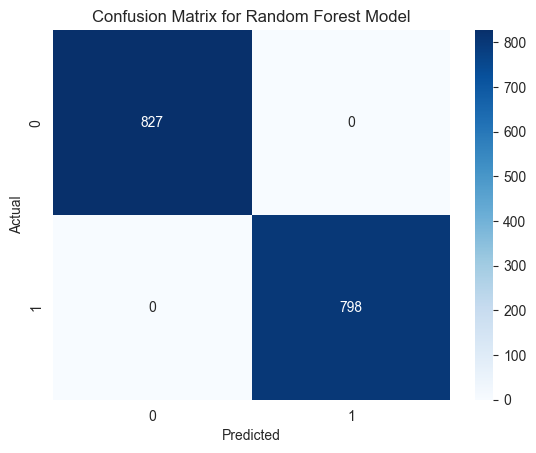

In [214]:
cm = confusion_matrix(y_test, y_predict_rf)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

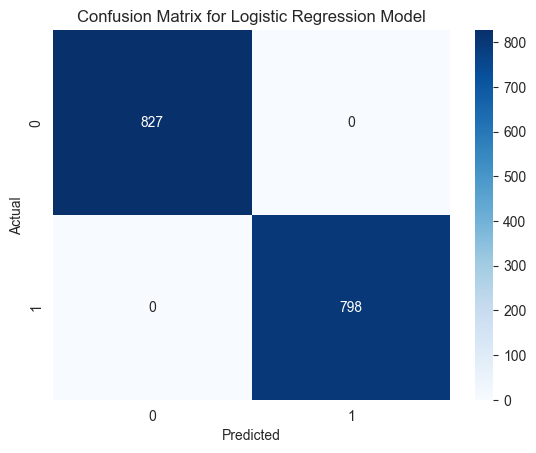

In [215]:
cm = confusion_matrix(y_test, y_predict_lr)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Logistic Regression Model")
plt.show()

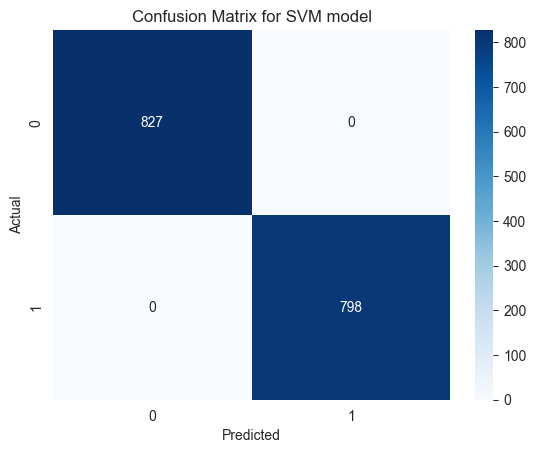

In [216]:
cm = confusion_matrix(y_test, svm_y_predict)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for SVM model")
plt.show()

## Investigate feature importances

In [217]:
best_rf = grid.best_estimator_

In [218]:
importances = best_rf.feature_importances_

pd_importances = pd.Series(importances, x_train.columns)

In [219]:
pd_importances.sort_values(ascending=False)

odor_n                 0.154783
gill-size_n            0.097114
odor_f                 0.086135
ring-type_p            0.050754
spore-print-color_h    0.041126
                         ...   
cap-shape_c            0.000158
spore-print-color_y    0.000148
gill-attachment_f      0.000099
gill-color_y           0.000085
gill-color_o           0.000000
Length: 95, dtype: float64

### t-test and boxplots for the feature: odor

In [220]:
odor_group0 = df["odor"][df["class"] == 0]
odor_group1 = df["odor"][df["class"] == 1]
t_test_odor = ttest_ind(odor_group0, odor_group1)

TypeError: unsupported operand type(s) for /: 'str' and 'int'

In [182]:
odor_group0

1       0
2       3
4       5
5       0
6       0
       ..
8115    5
8119    5
8120    5
8121    5
8123    5
Name: odor, Length: 4208, dtype: int64

A very small p-value indicates a statistically significant difference between the groups:

In [183]:
t_test_odor[1]

np.float64(2.9293064350132646e-17)

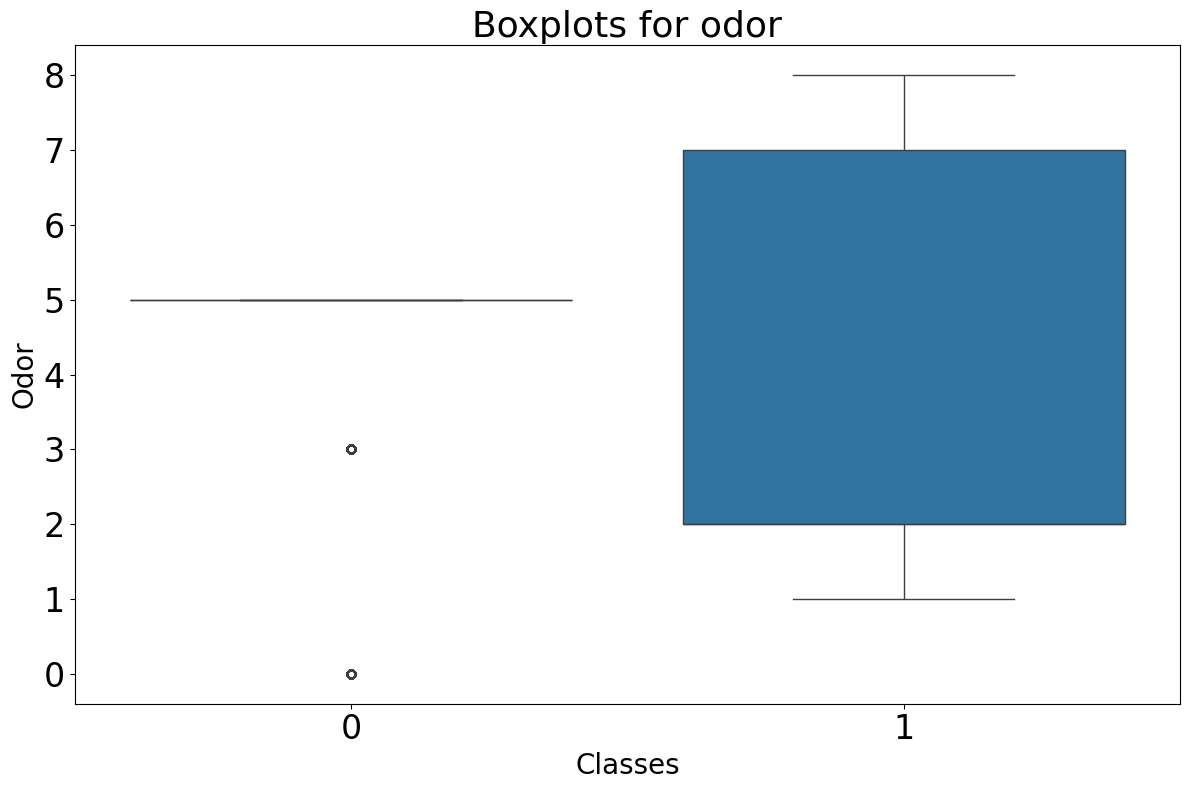

In [184]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="class", y="odor", data=df)

plt.title(f"Boxplots for odor", fontsize=26)
plt.xlabel("Classes", fontsize=20)
plt.ylabel("Odor", fontsize=20)
plt.tick_params(axis="both", labelsize=24)
plt.tight_layout()
plt.show()

In [185]:
odor_group0.describe()

count    4208.000000
mean        4.334601
std         1.521331
min         0.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: odor, dtype: float64

### t-test and boxplots for the feature: spore-print-color

In [186]:
spore_print_col0 = df["spore-print-color"][df["class"] == 0]
spore_print_col1 = df["spore-print-color"][df["class"] == 1]
t_test_spc = ttest_ind(spore_print_col0, spore_print_col1)

In [187]:
print(spore_print_col0.describe())

count    4208.000000
mean        3.201521
std         1.757669
min         0.000000
25%         2.000000
50%         3.000000
75%         3.000000
max         8.000000
Name: spore-print-color, dtype: float64


In [188]:
print(spore_print_col1.describe())

count    3916.000000
mean        4.021450
std         2.847965
min         1.000000
25%         1.000000
50%         3.000000
75%         7.000000
max         7.000000
Name: spore-print-color, dtype: float64


A very small p-value indicates a statistically significant difference between the groups:

In [189]:
t_test_spc[1]

np.float64(5.895941934965516e-55)

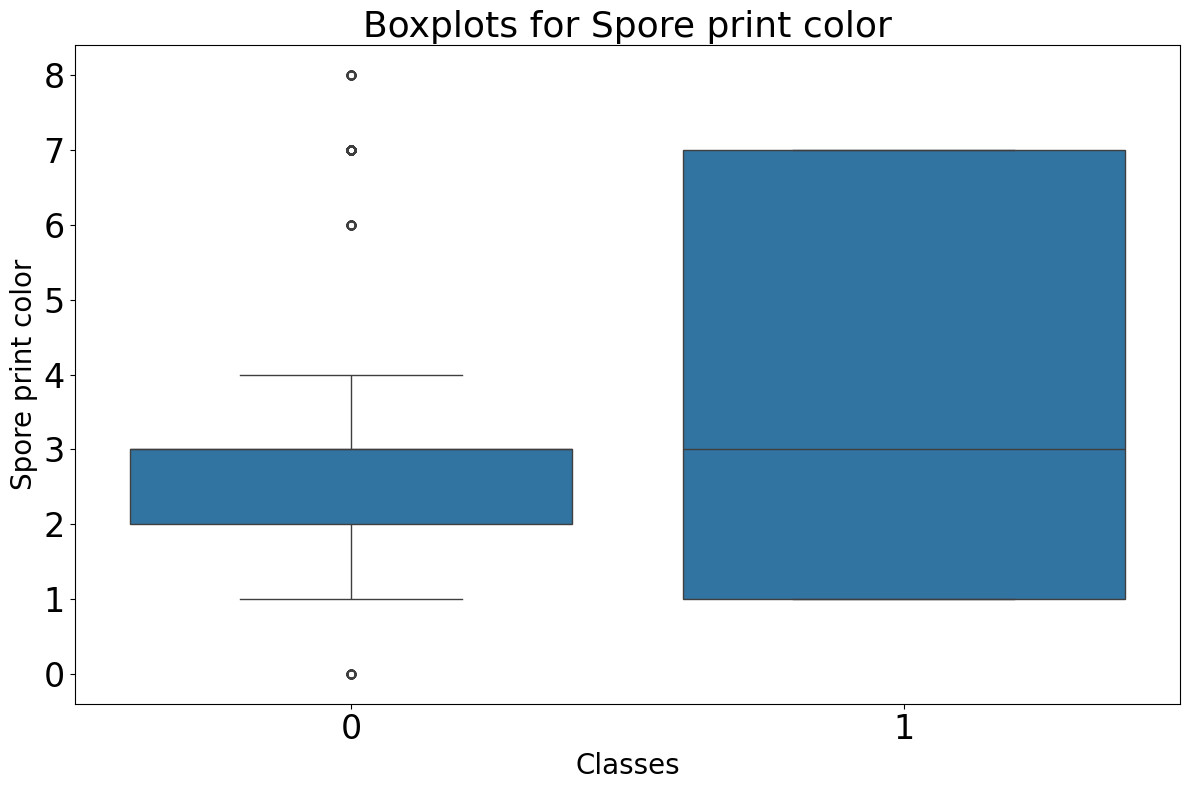

In [190]:
plt.figure(figsize=(12, 8))
sns.boxplot(x="class", y="spore-print-color", data=df)

plt.title(f"Boxplots for Spore print color", fontsize=26)
plt.xlabel("Classes", fontsize=20)
plt.ylabel("Spore print color", fontsize=20)
plt.tick_params(axis="both", labelsize=24)
plt.tight_layout()
plt.show()

Edible species are homogeneous in spore color - a stable characteristic with low variance.
Poisonous species are heterogeneous in spore color - spanning from light to dark (and possibly bright warning colors like red or green)

### investigate gill-size distribution

In [191]:
classes = {
    0: 'edible',
    1: 'poisonous'
}

gill_size_map = {
    0: 'broad',
    1: 'narrow'
}

df['gill-size'] = df['gill-size'].map(gill_size_map)

In [192]:
grouped = df.groupby('class')['gill-size']

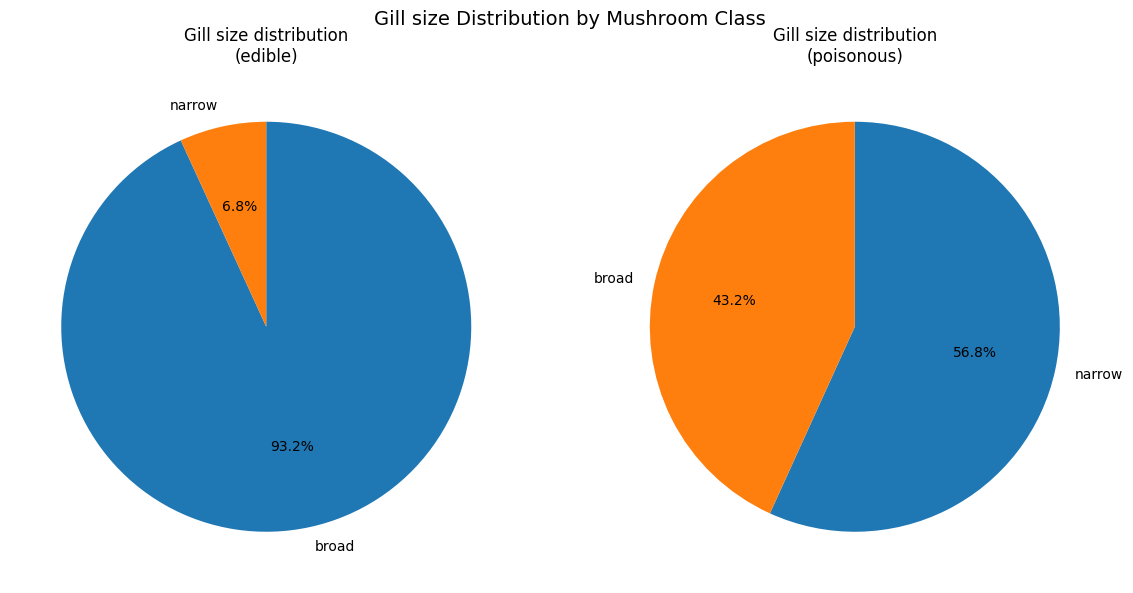

In [193]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

for i, (group_idx, group_data) in enumerate(grouped):
    counts = group_data.value_counts()
    axes[i].pie(
        counts,
        labels=counts.index,
        autopct='%1.1f%%',
        startangle=90,
        counterclock=False
    )
    axes[i].set_title(f"Gill size distribution\n({classes[group_idx]})")

plt.suptitle("Gill size Distribution by Mushroom Class", fontsize=14)
plt.tight_layout()
plt.show()